In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from pythtb import *
%matplotlib inline
sigma_0 = np.array([[1, 0], [0, 1]])
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

In [198]:
import numpy as np

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

result = np.kron(A, B)
print(result)

[[ 5  6 10 12]
 [ 7  8 14 16]
 [15 18 20 24]
 [21 24 28 32]]


### Normal Hamiltonian

In [116]:
# Define the Hamiltonian function
def H_0(kx, ky, kz, A, theta, k1):
    # Reshape kx, ky, kz for broadcasting without adding unnecessary dimensions
    # This time, we ensure that they are compatible for broadcasting with each other,
    # but we don't mix them with the shape of the Pauli matrices directly here.
    kx = kx[:,:,:, None, None]
    ky = ky[:,:,:, None, None]
    kz = kz[:,:,:, None, None]

    # Compute each term of the Hamiltonian
    term_0 = (A * np.sin(kx) * np.sin(kz) + A*np.sin(k1)) * sigma_0
    term_x = (np.cos(kx) - np.cos(k1)) * sigma_x
    term_y = np.sin(ky) * sigma_y
    term_z = (1 - np.cos(kz) - np.cos(ky)) * sigma_z

    # Sum the terms; broadcasting occurs here, resulting in an array of shape [100, 100, 100, 2, 2]
    H = term_0 + term_x + term_y + term_z
    return H

A = 0.3
theta = 0
k1 =  1.1*np.pi / 2
kx = np.linspace(-np.pi, np.pi, 100)
ky = np.linspace(-np.pi, np.pi, 100)
kz = np.linspace(-np.pi, np.pi, 100)

# Create meshgrids for kx, ky, kz to apply broadcasting
kx_grid, ky_grid, kz_grid = np.meshgrid(kx, ky, kz, indexing='ij')

# Vectorized operation to compute Hamiltonian for all points
H = H_0(kx_grid, ky_grid, kz_grid, A, theta, k1)

# Flatten the Hamiltonian to simplify the loop for eigenvalue computation
H_flat = H.reshape(-1, 2, 2)  # Now H_flat has shape [1000000, 2, 2]

# Preallocate the array for eigenvalues
E_flat = np.zeros((H_flat.shape[0], 2))  # Each 2x2 Hamiltonian has 2 eigenvalues

# Compute eigenvalues for each Hamiltonian matrix
for i, hamiltonian in enumerate(H_flat):
    E_flat[i] = eigh(hamiltonian, eigvals_only=True)

# Reshape the eigenvalues back to the grid
E = E_flat.reshape(len(kx), len(ky), len(kz), 2)

# At this point, E contains the eigenvalues of the Hamiltonian at each point in the k-space grid


Text(0.5, 0, '$E$')

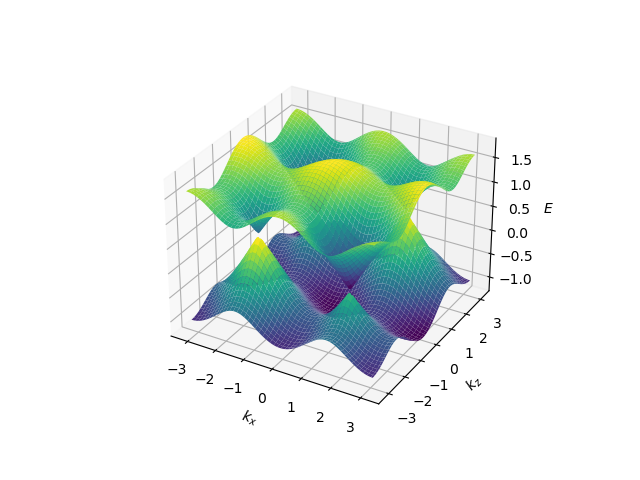

In [117]:
%matplotlib widget
kx_, kz_ = np.meshgrid(kx, kz)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(kx_, kz_, E[:, 50, :, 0], cmap='viridis')
ax.plot_surface(kx_, kz_, E[:, 50, :, 1], cmap='viridis')
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_z$')
ax.set_zlabel(r'$E$')

Text(0.5, 0, '$E$')

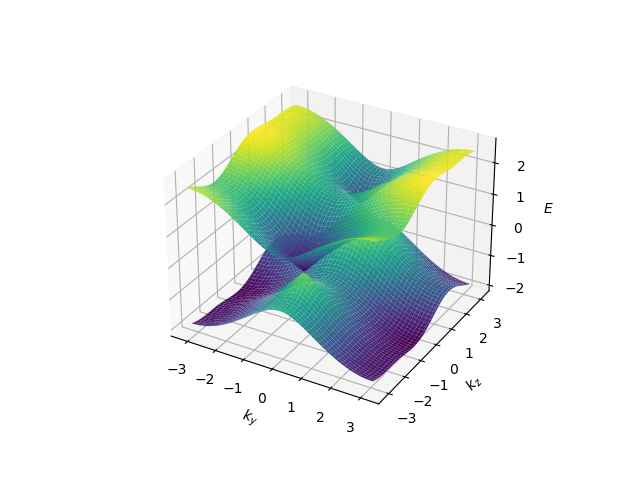

In [17]:
%matplotlib widget
kx_, ky_ = np.meshgrid(kx, ky)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(kx_, ky_, E[:, :, 74, 0], cmap='viridis')
ax.plot_surface(kx_, ky_, E[:, :, 74, 1], cmap='viridis')
ax.set_xlabel(r'$k_y$')
ax.set_ylabel(r'$k_z$')
ax.set_zlabel(r'$E$')

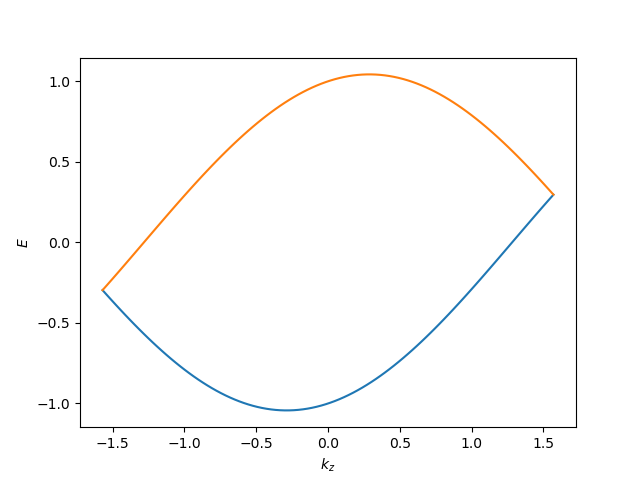

In [125]:
#calculate the band structure along kx = k1/(2*np.pi) and ky = 0 for kz in [-pi, pi]

A = 0.3
theta = 0
k1 =  1.1*np.pi / 2

from numba import jit

@jit(nopython = True)
def H_k_0(kx, ky, kz, A = A, theta = theta, k1 = k1):
 

    # Compute each term of the Hamiltonian
    term_0 = (A * np.sin(kx) * np.sin(kz)) * sigma_0
    term_x = (np.cos(kx) - np.cos(k1)) * sigma_x
    term_y = np.sin(ky) * sigma_y
    term_z = (1 - np.cos(kz) - np.cos(ky)) * sigma_z

    
    H = term_0 + term_x + term_y + term_z
    return H

kx = k1
ky = 0
kz = np.linspace(-np.pi/2, np.pi/2, 100)

H_k = np.zeros((100, 2, 2), dtype=np.complex128)
for i, kz_val in enumerate(kz):
    H_k[i] = H_k_0(kx, ky, kz_val)

E_k = np.zeros((100, 2))
for i, hamiltonian in enumerate(H_k):
    E_k[i] = eigh(hamiltonian, eigvals_only=True)

plt.figure()
plt.plot(kz, E_k[:, 0])
plt.plot(kz, E_k[:, 1])
plt.xlabel(r'$k_z$')
plt.ylabel(r'$E$')
plt.show()

----- k_path report begin ----------
real-space lattice vectors
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
k-space metric tensor
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
internal coordinates of nodes
 [[ 0.275  0.    -0.5  ]
 [ 0.275  0.     0.5  ]]
reciprocal-space lattice vectors
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
cartesian coordinates of nodes
 [[ 0.275  0.    -0.5  ]
 [ 0.275  0.     0.5  ]]
list of segments:
  length =     1.0  from  [ 0.275  0.    -0.5  ]  to  [0.275 0.    0.5  ]
node distance list: [0. 1.]
node index list:    [  0 300]
----- k_path report end ------------



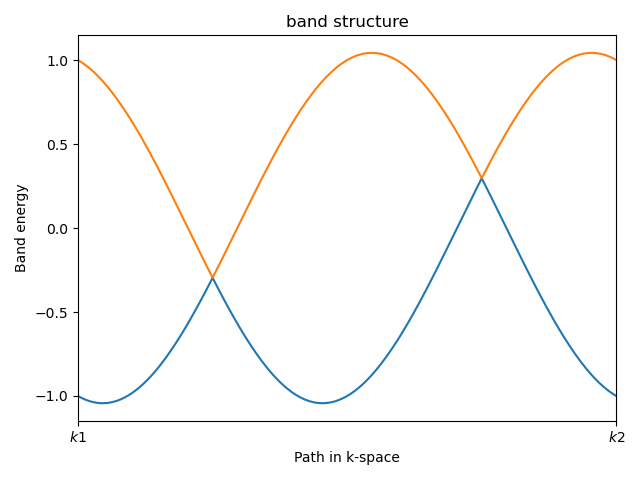

In [128]:
#origianl unit cell
lat=[[1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,1.0]]
# define coordinates of orbitals
orb=[[0.0,0.0,0.0],[0.0,0.0,0.0]]
model1 = tb_model(3,3,lat,orb)
A = 0.3
theta = 0
k1 = 1.1*np.pi/2

Terms = [
    (-A/4, 0, 0, -1, 0, -1),
    (-A/4, 1, 1, -1, 0, -1),
    (A/4, 0, 0,-1,0,1),
    (A/4, 1, 1,-1,0,1),
    (-np.cos(k1),0,1,0,0,0),
    (np.exp(1j*theta)/2,0,1,-1,0,0),
    (np.exp(1j*theta)/2,1,0,-1,0,0),
    (1/(2j)*(-1j),1,0, 0,-1,0),
    (1/(2j)*(1j),0,1, 0,-1,0),
    (1, 0, 0, 0, 0, 0),
    (-1, 1, 1, 0, 0, 0),
    (1/2, 0, 0, 0,0,-1),
    (-1/2, 1, 1, 0,0,-1),
    (-1/2,0, 0, 0, -1, 0),
    (1/2, 1, 1, 0, -1, 0),
]

for term in Terms:
    if term[1] == term[2] and [term[3],term[4],term[5]] == [0,0,0]:
        model1.set_onsite(term[0],term[1])
    else:
        model1.set_hop(term[0], term[1], term[2], [term[3],term[4],term[5]])



# define path in k-space (high symmetry points)
path=[[k1/(2*np.pi),0.0,-0.5],[k1/(2*np.pi),0.0,0.5]]
label=(r'$k1$',r'$k2$')
# set the path and labels
(k_vec,k_dist,k_node)=model1.k_path(path,301)
# solve model
evals = model1.solve_all(k_vec)



fig, ax = plt.subplots()

# specify horizontal axis details
ax.set_xlim(k_node[0],k_node[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(label)
for n in range(len(k_node)):
  ax.axvline(x=k_node[n], linewidth=0.5, color='k')

# plot bands
for n in range(2):
  ax.plot(k_dist,evals[n])
# put title
ax.set_title("band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")
# make an PDF figure of a plot
fig.tight_layout()


In [129]:
#Add additional terms to the model
model1 = model1.make_supercell([[1,0,0],[0,1,0],[0,0,2]])
delta = 0.0 #CDW coupling amplitude
delta2 = 0.0
Terms = [
    (delta, 3, 0, 0, 0, 0),
    (delta, 2, 1, 0, 0, 0),
    (-delta, 3, 0, 0, 0, 1),
    (-delta, 2, 1, 0, 0, 1),
    (delta2, 2, 0, 0, 0, 0), #Interorbital hopping
    (delta2, 3, 1, 0, 0, 0),
    (-delta2, 0, 2, 0, 0, -1),
    (-delta2, 1, 3, 0, 0, -1),
]

for term in Terms:
    model1.set_hop(term[0], term[1], term[2], [term[3],term[4],term[5]], mode="add")

----- k_path report begin ----------
real-space lattice vectors
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 2.]]
k-space metric tensor
 [[1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   0.25]]
internal coordinates of nodes
 [[ 0.275  0.    -0.5  ]
 [ 0.275  0.     0.5  ]]
reciprocal-space lattice vectors
 [[1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.  0.5]]
cartesian coordinates of nodes
 [[ 0.275  0.    -0.25 ]
 [ 0.275  0.     0.25 ]]
list of segments:
  length =     0.5  from  [ 0.275  0.    -0.5  ]  to  [0.275 0.    0.5  ]
node distance list: [0.  0.5]
node index list:    [  0 300]
----- k_path report end ------------



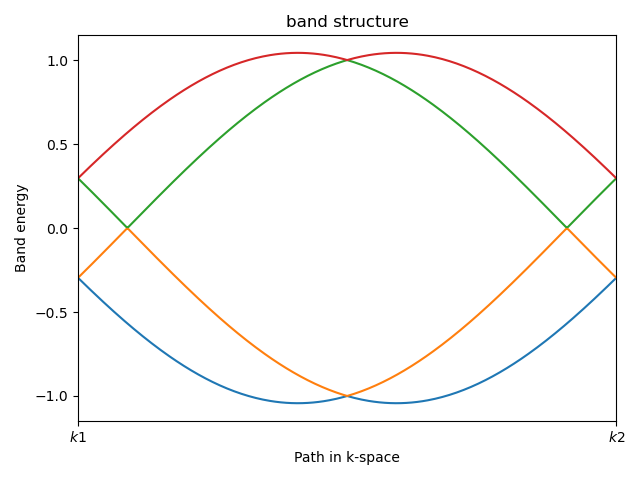

In [130]:
#Add additional terms to the model

path=[[k1/(2*np.pi),0.0,-0.5],[k1/(2*np.pi),0.0,0.5]]
label=(r'$k1$',r'$k2$')
# set the path and labels
(k_vec,k_dist,k_node)=model1.k_path(path,301)
# solve model
evals = model1.solve_all(k_vec)
# plot band structur


fig, ax = plt.subplots()

# specify horizontal axis details
ax.set_xlim(k_node[0],k_node[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(label)
for n in range(len(k_node)):
  ax.axvline(x=k_node[n], linewidth=0.5, color='k')

# plot bands
for n in range(4):
  ax.plot(k_dist,evals[n])
# put title
ax.set_title("band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")
# make an PDF figure of a plot
fig.tight_layout()


### Manually Double the unit cell

In [111]:
#Now we include CDW along the z direction and Q = Pi/2, and build the real space Hamiltonian using pythTB
#First test the pythTB package
# define lattice vectors
lat=[[1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,2.0]]
# define coordinates of orbitals
orb=[[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.5],[0.0,0.0,0.5]]

model = tb_model(3,3,lat,orb)
A = 0.3
theta = 0
k1 =1.1* np.pi/2


Terms = [
    (-A/4, 0, 2, 1, 0, 0),
    (-A/4, 1, 3, 1, 0, 0),
    (-A/4, 2, 0, 1, 0, 1),
    (-A/4, 3, 1, 1, 0, 1),
    (A/4, 2, 0, -1, 0 , 1),
    (A/4, 3, 1, -1, 0 , 1),
    (A/4, 0, 2, -1, 0 ,0 ),
    (A/4, 1, 3, -1, 0 ,0 ),
    (-np.cos(k1), 0, 1, 0, 0, 0),
    (-np.cos(k1), 2, 3, 0, 0, 0),
    (np.exp(1j*theta)/2,0, 1 ,-1,0,0),
    (np.exp(1j*theta)/2,2, 3 ,-1,0,0),
    (np.exp(1j*theta)/2,1, 0 ,-1,0,0),
    (np.exp(1j*theta)/2,3, 2 ,-1,0,0),
    (1/(2j)*(-1j),1,0, 0, -1, 0),
    (1/(2j)*(1j), 0,1, 0, -1, 0),
    (1/(2j)*(-1j),3,2, 0, -1, 0),
    (1/(2j)*(1j), 2,3, 0, -1, 0),
    (1, 0, 0, 0, 0, 0),
    (-1, 1, 1, 0, 0, 0),
    (1, 2, 2, 0, 0, 0),
    (-1, 3, 3, 0, 0, 0),
    (0.5, 2, 0, 0, 0, 0),
    (-0.5, 3, 1, 0, 0, 0),
    (0.5, 0, 2, 0, 0, -1),
    (-0.5, 1, 3, 0, 0, -1),
    (-0.5, 0, 0, 0, -1,0),
    (0.5, 1, 1, 0, -1,0),
    (-0.5, 2, 2, 0.0, -1, 0),
    (0.5, 3, 3, 0, -1,0)

]



# set model parameters
for term in Terms:
    if term[1] == term[2] and [term[3],term[4],term[5]] == [0,0,0]:
        model.set_onsite(term[0],term[1])
    else:
        model.set_hop(term[0], term[1], term[2], [term[3],term[4],term[5]], mode="add")


In [112]:
# define path in k-space (high symmetry points)
path=[[k1/(2*np.pi),0.0,-1],[k1/(2*np.pi),0.0,1]]
label=(r'$k1$',r'$k2$')
# set the path and labels
(k_vec,k_dist,k_node)=model.k_path(path,301)
# solve model
evals = model.solve_all(k_vec)
# plot band structur

----- k_path report begin ----------
real-space lattice vectors
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 2.]]
k-space metric tensor
 [[1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   0.25]]
internal coordinates of nodes
 [[ 0.275  0.    -1.   ]
 [ 0.275  0.     1.   ]]
reciprocal-space lattice vectors
 [[1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.  0.5]]
cartesian coordinates of nodes
 [[ 0.275  0.    -0.5  ]
 [ 0.275  0.     0.5  ]]
list of segments:
  length =     1.0  from  [ 0.275  0.    -1.   ]  to  [0.275 0.    1.   ]
node distance list: [0. 1.]
node index list:    [  0 300]
----- k_path report end ------------



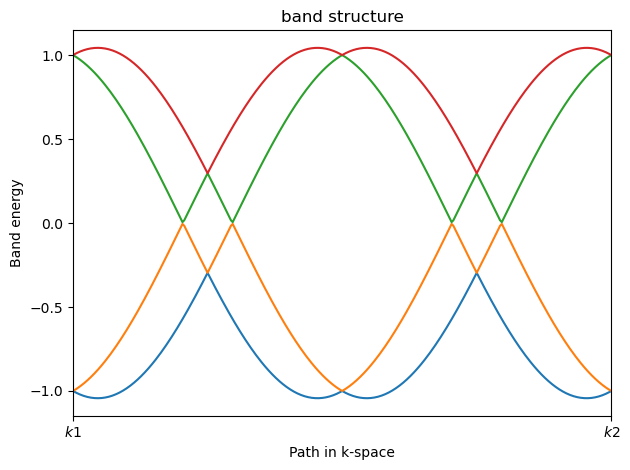

In [113]:
fig, ax = plt.subplots()

# specify horizontal axis details
ax.set_xlim(k_node[0],k_node[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(label)
for n in range(len(k_node)):
  ax.axvline(x=k_node[n], linewidth=0.5, color='k')

# plot bands
for n in range(4):
  ax.plot(k_dist,evals[n])
# put title
ax.set_title("band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")
# make an PDF figure of a plot
fig.tight_layout()


### Add interaction term

In [145]:
#Now we include CDW along the z direction and Q = Pi/2, and build the real space Hamiltonian using pythTB

# define lattice vectors
lat=[[1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,2.0]]
# define coordinates of orbitals
orb=[[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.5],[0.0,0.0,0.5]]

model = tb_model(3,3,lat,orb)
A = 0.3
theta = 0
k1 =1.1* np.pi/2
delta = 0.05 #CDW coupling amplitude
delta2 = 0.05


Terms = [
    (-A/4, 0, 2, 1, 0, 0),
    (-A/4, 1, 3, 1, 0, 0),
    (-A/4, 2, 0, 1, 0, 1),
    (-A/4, 3, 1, 1, 0, 1),
    (A/4, 2, 0, -1, 0 , 1),
    (A/4, 3, 1, -1, 0 , 1),
    (A/4, 0, 2, -1, 0 ,0 ),
    (A/4, 1, 3, -1, 0 ,0 ),
    (-np.cos(k1), 0, 1, 0, 0, 0),
    (-np.cos(k1), 2, 3, 0, 0, 0),
    (np.exp(1j*theta)/2,0, 1 ,-1,0,0),
    (np.exp(1j*theta)/2,2, 3 ,-1,0,0),
    (np.exp(1j*theta)/2,1, 0 ,-1,0,0),
    (np.exp(1j*theta)/2,3, 2 ,-1,0,0),
    (1/(2j)*(-1j),1,0, 0, -1, 0),
    (1/(2j)*(1j), 0,1, 0, -1, 0),
    (1/(2j)*(-1j),3,2, 0, -1, 0),
    (1/(2j)*(1j), 2,3, 0, -1, 0),
    (1, 0, 0, 0, 0, 0),
    (-1, 1, 1, 0, 0, 0),
    (1, 2, 2, 0, 0, 0),
    (-1, 3, 3, 0, 0, 0),
    (0.5 + delta2, 2, 0, 0, 0, 0), #Interorbital hopping
    (-0.5 + delta2, 3, 1, 0, 0, 0),
    (0.5 - delta2, 0, 2, 0, 0, -1),
    (-0.5 - delta2, 1, 3, 0, 0, -1),
    (-0.5, 0, 0, 0, -1,0),
    (0.5, 1, 1, 0, -1,0),
    (-0.5, 2, 2, 0.0, -1, 0),
    (0.5, 3, 3, 0, -1,0),
    #CDW terms
    (delta, 3, 0, 0, 0, 0),
    (delta, 2, 1, 0, 0, 0),
    (-delta, 3, 0, 0, 0, 1),
    (-delta, 2, 1, 0, 0, 1),
    
]



# set model parameters
for term in Terms:
    if term[1] == term[2] and [term[3],term[4],term[5]] == [0,0,0]:
        model.set_onsite(term[0],term[1])
    else:
        model.set_hop(term[0], term[1], term[2], [term[3],term[4],term[5]], mode="add")


# define path in k-space (high symmetry points)
path=[[k1/(2*np.pi),0.0,-1],[k1/(2*np.pi),0.0,1]]
label=(r'$k1$',r'$k2$')
# set the path and labels
(k_vec,k_dist,k_node)=model.k_path(path,301)
# solve model
evals = model.solve_all(k_vec)


----- k_path report begin ----------
real-space lattice vectors
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 2.]]
k-space metric tensor
 [[1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   0.25]]
internal coordinates of nodes
 [[ 0.275  0.    -1.   ]
 [ 0.275  0.     1.   ]]
reciprocal-space lattice vectors
 [[1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.  0.5]]
cartesian coordinates of nodes
 [[ 0.275  0.    -0.5  ]
 [ 0.275  0.     0.5  ]]
list of segments:
  length =     1.0  from  [ 0.275  0.    -1.   ]  to  [0.275 0.    1.   ]
node distance list: [0. 1.]
node index list:    [  0 300]
----- k_path report end ------------



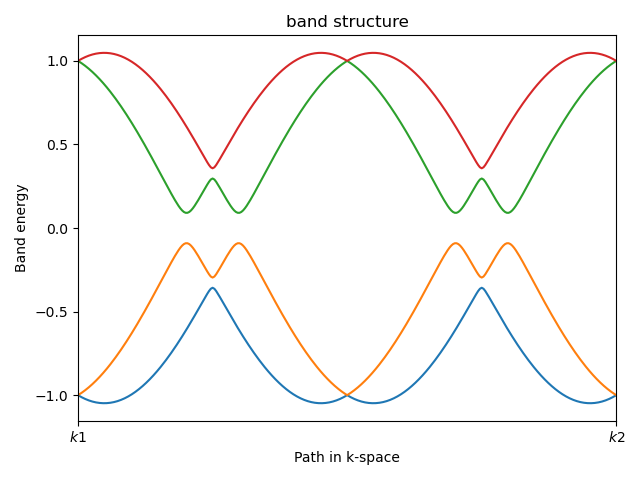

In [146]:
fig, ax = plt.subplots()

# specify horizontal axis details
ax.set_xlim(k_node[0],k_node[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(label)
for n in range(len(k_node)):
  ax.axvline(x=k_node[n], linewidth=0.5, color='k')

# plot bands
for n in range(4):
  ax.plot(k_dist,evals[n])
# put title
ax.set_title("band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")
# make an PDF figure of a plot
fig.tight_layout()

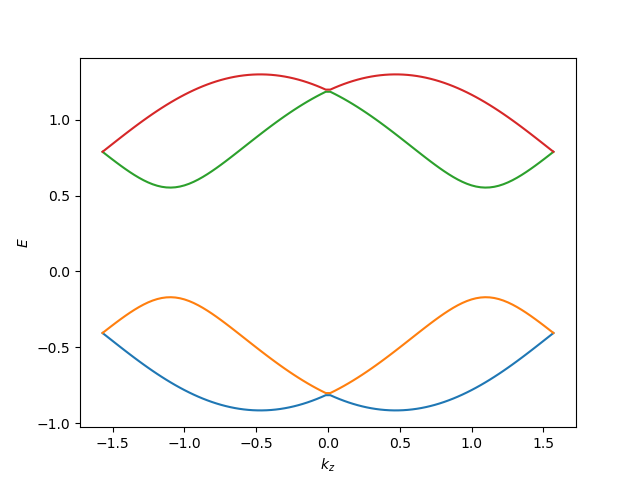

In [24]:
#Diagnolize by my own code
lattice  = np.array([[1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,2.0]], dtype = np.complex128)
position = np.array([[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.5],[0.0,0.0,0.5]], dtype = np.complex128)


A = 0.3
theta = 0
k1 =  1.1*np.pi / 5
#How to gap out the Weyl points? Right now the two Weyl points are not at the same energy, unless we set k1 = 0
Fermi_level = 0
gap = 0.2 # 0.2*(1 + 1j)
delta = gap#CDW coupling amplitude
delta2 = gap#gap


def setting_terms(A, theta, k1, Fermi_level, delta, delta2):
    return np.array([
    (-A/4, 0, 2, 1, 0, 0),
    (-A/4, 1, 3, 1, 0, 0),
    (-A/4, 2, 0, 1, 0, 1),
    (-A/4, 3, 1, 1, 0, 1),
    (A/4, 2, 0, -1, 0 , 1),
    (A/4, 3, 1, -1, 0 , 1),
    (A/4, 0, 2, -1, 0 ,0 ),
    (A/4, 1, 3, -1, 0 ,0 ),
    (-np.cos(k1), 0, 1, 0, 0, 0),
    (-np.cos(k1), 2, 3, 0, 0, 0),
    (np.exp(1j*theta)/2,0, 1 ,-1,0,0),
    (np.exp(1j*theta)/2,2, 3 ,-1,0,0),
    (np.exp(1j*theta)/2,1, 0 ,-1,0,0),
    (np.exp(1j*theta)/2,3, 2 ,-1,0,0),
    (1/(2j)*(-1j),1,0, 0, -1, 0),
    (1/(2j)*(1j), 0,1, 0, -1, 0),
    (1/(2j)*(-1j),3,2, 0, -1, 0),
    (1/(2j)*(1j), 2,3, 0, -1, 0),
    (1/2 + (A*np.sin(k1) - Fermi_level)/2, 0, 0, 0, 0, 0),
    (-1/2 + (A*np.sin(k1) - Fermi_level)/2, 1, 1, 0, 0, 0),
    (1/2 + (A*np.sin(k1) - Fermi_level)/2, 2, 2, 0, 0, 0),
    (-1/2 + (A*np.sin(k1) - Fermi_level)/2, 3, 3, 0, 0, 0),
    (0.5 + delta2, 2, 0, 0, 0, 0), #Interorbital hopping
    (-0.5 - delta2, 3, 1, 0, 0, 0),
    (0.5 - delta2, 0, 2, 0, 0, -1),
    (-0.5 + delta2, 1, 3, 0, 0, -1),
    (-0.5, 0, 0, 0, -1,0),
    (0.5, 1, 1, 0, -1,0),
    (-0.5, 2, 2, 0.0, -1, 0),
    (0.5, 3, 3, 0, -1,0),
    #CDW terms
    (delta, 3, 0, 0, 0, 0),
    (delta, 2, 1, 0, 0, 0),
    (-delta, 3, 0, 0, 0, 1),
    (-delta, 2, 1, 0, 0, 1),
], dtype = np.complex128)

Terms = setting_terms(A, theta, k1, Fermi_level, delta, delta2)


@jit(nopython = True)
#Need to optimize this function and its derivatives
def Hk_double(kx, ky, kz, terms = Terms, lattice = lattice, position = position):
    h_k = np.zeros((4,4),dtype=np.complex128)
    k_vector = np.array([kx,ky,kz], dtype = np.complex128)
    for term in terms:
        R = term[3] * lattice[0] + term[4] * lattice[1] + term[5] * lattice[2] + position[int(term[2].real)] @ lattice - position[int(term[1].real)] @ lattice
        phase = term[0]*np.exp(-1j*np.dot(k_vector,R))
        h_k[int(term[2].real),int(term[1].real)] += phase
        h_k[int(term[1].real),int(term[2].real)] += phase.conjugate()
    return h_k


kx = k1
ky = 0
kz = np.linspace(-np.pi/2, np.pi/2, 100)

H_k = np.zeros((100, 4, 4), dtype=np.complex128)
for i, kz_val in enumerate(kz):
    H_k[i] = Hk_double(kx, ky, kz_val)

E_k = np.zeros((100, 4))
for i, hamiltonian in enumerate(H_k):
    E_k[i] = np.linalg.eigvalsh(hamiltonian)

plt.figure()
plt.plot(kz, E_k[:, 0])
plt.plot(kz, E_k[:, 1])
plt.plot(kz, E_k[:, 2])
plt.plot(kz, E_k[:, 3])
plt.xlabel(r'$k_z$')
plt.ylabel(r'$E$')
plt.show()

In [23]:
30*30*30*4*4/53644

8.053090746402207

#### Magnetic Weyl semimetal with CDW

 Model is adopted from paper: https://journals.aps.org/prb/pdf/10.1103/PhysRevB.104.155120

Text(0.5, 0, '$E$')

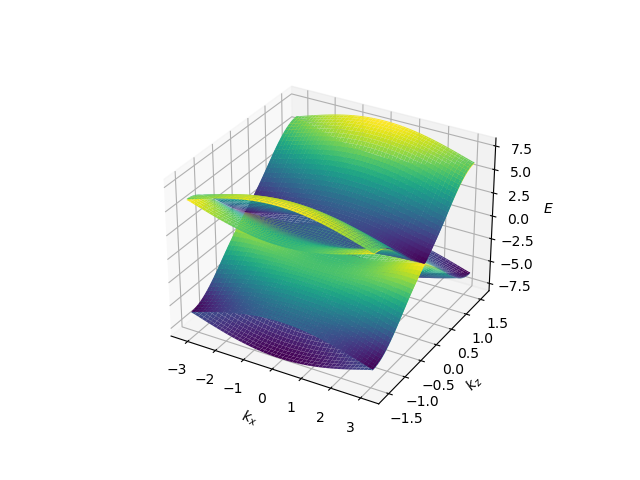

In [17]:


sigma_0 = np.array([[1, 0], [0, 1]], dtype = np.complex128)
sigma_x = np.array([[0, 1], [1, 0]], dtype = np.complex128)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype = np.complex128)
sigma_z = np.array([[1, 0], [0, -1]], dtype = np.complex128)

from numba import jit
@jit(nopython = True)
def H_k_mag(kx, ky, kz, t, m, gap):
    # Compute each term of the Hamiltonian
    term0 = 2*(-t*np.sin(kx)*np.kron(sigma_x,sigma_0))
    term1 = 2*(t*np.sin(ky)*np.kron(sigma_y,sigma_0))
    term2 = 2*(t*np.cos(kz)*np.kron(sigma_z,sigma_x))
    term3 = -m*(2 - np.cos(kx) - np.cos(ky))*np.kron(sigma_z,sigma_0)
    term4 = gap*np.kron(sigma_z,sigma_z)

    return term0 + term1 + term2 + term3 + term4
    
t = 1
m = 3
gap = 0.05
kx = np.linspace(-np.pi, np.pi, 100)
ky = 0
kz = np.linspace(-np.pi/2, np.pi/2, 100)

H_k = np.zeros((100,100, 4, 4), dtype=np.complex128)
for i, kx_val in enumerate(kx):
    for j, kz_val in enumerate(kz):
        H_k[i,j] = H_k_mag(kx_val, ky, kz_val, t, m, gap)

E_k = np.zeros((100, 100, 4))
for i, kx_val in enumerate(kx):
    for j, kz_val in enumerate(kz):
        E_k[i,j] = np.linalg.eigvalsh(H_k[i,j])

#plot 3D band structure
%matplotlib widget
kx_, kz_ = np.meshgrid(kx, kz)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(kx_, kz_, E_k[:, :, 0], cmap='viridis')
ax.plot_surface(kx_, kz_, E_k[:, :, 1], cmap='viridis')
ax.plot_surface(kx_, kz_, E_k[:, :, 2], cmap='viridis')
ax.plot_surface(kx_, kz_, E_k[:, :, 3], cmap='viridis')
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_z$')
ax.set_zlabel(r'$E$')




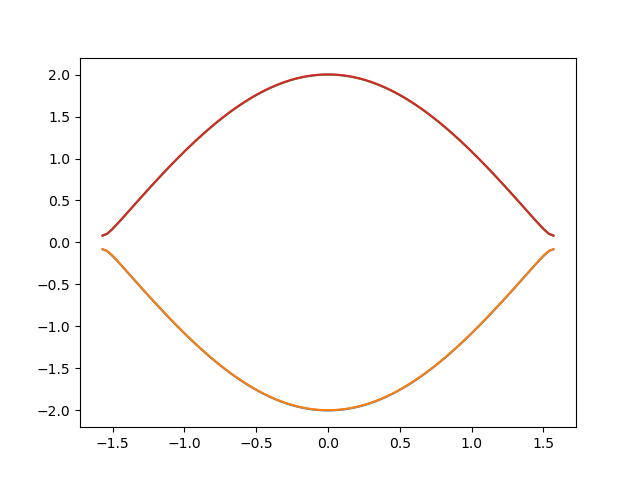

In [18]:
#plot kx = 0 band structure
fig, ax = plt.subplots()
plt.plot(kz, E_k[50, :, 0])
plt.plot(kz, E_k[50, :, 1])
plt.plot(kz, E_k[50, :, 2])
plt.plot(kz, E_k[50, :, 3])

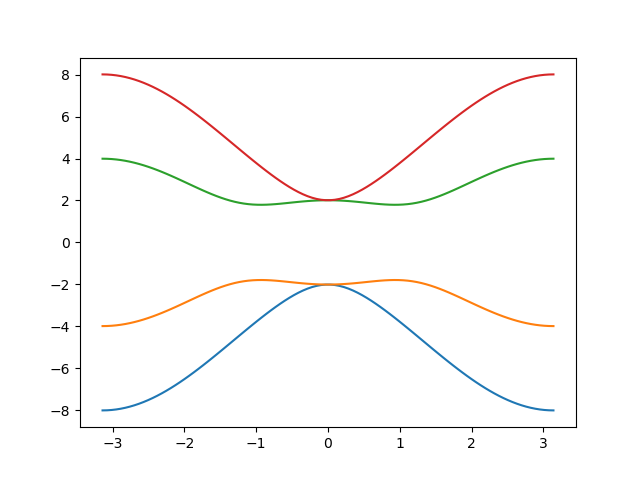

In [30]:
fig, ax = plt.subplots()
plt.plot(kx, E_k[:, 50, 0])
plt.plot(kx, E_k[:, 50, 1])
plt.plot(kx, E_k[:, 50, 2])
plt.plot(kx, E_k[:, 50, 3])

In [20]:
#Calculate the derived gap at kx = 0, ky = 0, kz = pi/2
kx = 0
ky = 0
kz = np.pi/2
Weyl_gap = []
for index in range(100):
    H_k = H_k_mag(kx, ky, kz, t, m, 0 + 0.002*index)
    E = np.linalg.eigvalsh(H_k)
    Weyl_gap.append(E[2] - E[1])
    print((E[2] - E[1])/(0 + 0.002*index) if index != 0 else 0)

0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0


[2.4492935982947064e-16,
 0.004,
 0.008,
 0.012,
 0.016,
 0.02,
 0.024,
 0.028,
 0.032,
 0.036000000000000004,
 0.04,
 0.044,
 0.048,
 0.052000000000000005,
 0.056,
 0.06,
 0.064,
 0.068,
 0.07200000000000001,
 0.076,
 0.08,
 0.084,
 0.088,
 0.092,
 0.096,
 0.1,
 0.10400000000000001,
 0.108,
 0.112,
 0.116,
 0.12,
 0.124,
 0.128,
 0.132,
 0.136,
 0.14,
 0.14400000000000002,
 0.148,
 0.152,
 0.156,
 0.16,
 0.164,
 0.168,
 0.17200000000000001,
 0.176,
 0.18,
 0.184,
 0.188,
 0.192,
 0.196,
 0.2,
 0.20400000000000001,
 0.20800000000000002,
 0.212,
 0.216,
 0.22,
 0.224,
 0.228,
 0.232,
 0.23600000000000002,
 0.24,
 0.244,
 0.248,
 0.252,
 0.256,
 0.26,
 0.264,
 0.268,
 0.272,
 0.276,
 0.28,
 0.28400000000000003,
 0.28800000000000003,
 0.292,
 0.296,
 0.3,
 0.304,
 0.308,
 0.312,
 0.316,
 0.32,
 0.324,
 0.328,
 0.332,
 0.336,
 0.34,
 0.34400000000000003,
 0.34800000000000003,
 0.352,
 0.356,
 0.36,
 0.364,
 0.368,
 0.372,
 0.376,
 0.38,
 0.384,
 0.388,
 0.392,
 0.396]

### Calculating CPGE

#### Code for calculating CPGE

In [2]:
from numba import jit
@jit(nopython = True)
def Calculate_CPGE(grid, energy, H_k, a, b, c, stepa, stepb, stepc, polarization_factor = 1j):
    """
    
    energy is photon energy
    H_k is the Hamiltonian in k-space: [4,4,grid,grid,grid]
    delta is the linewidth
    a, b, c are the polarization vectors x : [1,0,0], y : [0,1,0], z : [0,0,1]

    The calculatiion is done in the zero temperature limit
    """
    sigma_abc = 0
    delta = 0.1
    for i in range(grid):
        print(i)
        for j in range(grid):
            for k in range(grid):
                E, V = np.linalg.eigh(H_k[:,:,i,j,k])
                H_D_a = (H_k[:,:,(i+int(a[0]))%grid,(j+int(a[1]))%grid,(k+int(a[2]))%grid] - H_k[:,:,i,j,k])/(a[0]*stepa + a[1]*stepb + a[2]*stepc)
                H_D_b = (H_k[:,:,(i+int(b[0]))%grid,(j+int(b[1]))%grid,(k+int(b[2]))%grid] - H_k[:,:,i,j,k])/(b[0]*stepa + b[1]*stepb + b[2]*stepc)
                H_D_c = (H_k[:,:,(i+int(c[0]))%grid,(j+int(c[1]))%grid,(k+int(c[2]))%grid] - H_k[:,:,i,j,k])/(c[0]*stepa + c[1]*stepb + c[2]*stepc)
                for l in range(H_D_a.shape[0]):
                    for m in range(H_D_a.shape[0]):
                        for n in range(H_D_a.shape[0]):
                            for omega in [energy, -energy]:
                                if E[l] < 0.0 and E[n] > 0.0:
                                    sigma_abc += (V[:,n].conj().T @ H_D_a @ V[:,l])*(V[:,l].conj().T @ H_D_b @ V[:,m]) * (V[:,m].conj().T @ H_D_c @ V[:,n])/((E[n] - E[m] - 1j*delta)*(E[n] - E[l] + omega - 1j*delta))
        
                                elif E[l] > 0.0 and E[n] < 0.0:
                                    sigma_abc -= (V[:,n].conj().T @ H_D_a @ V[:,l]*V[:,l].conj().T @ H_D_b @ V[:,m] * V[:,m].conj().T @ H_D_c @ V[:,n])/((E[n] - E[m] - 1j*delta)*(E[n] - E[l] + omega - 1j*delta))
                                    
    return np.real(sigma_abc*polarization_factor)/(energy**2)

#### Simple Model for calibration

In [8]:
#Calibrate the function

def H_0(kx, ky, kz, A, theta, k1):
    # Reshape kx, ky, kz for broadcasting without adding unnecessary dimensions
    # This time, we ensure that they are compatible for broadcasting with each other,
    # but we don't mix them with the shape of the Pauli matrices directly here.
    kx = kx[:,:,:, None, None]
    ky = ky[:,:,:, None, None]
    kz = kz[:,:,:, None, None]

    # Compute each term of the Hamiltonian
    term_0 = (A * np.sin(kx) * np.sin(kz) +  A*np.sin(k1)) * sigma_0
    term_x = (np.cos(kx) - np.cos(k1)) * sigma_x
    term_y = np.sin(ky) * sigma_y
    term_z = (1 - np.cos(kz) - np.cos(ky)) * sigma_z

    # Sum the terms; broadcasting occurs here, resulting in an array of shape [100, 100, 100, 2, 2]
    H = term_0 + term_x + term_y + term_z
    return H

A = 0.3
theta = 0
k1 =  1.1*np.pi / 2
grid = 100
kx = np.linspace(-np.pi, np.pi, grid+1)[:-1]
ky = np.linspace(-np.pi, np.pi, grid+1)[:-1]
kz = np.linspace(-np.pi, np.pi, grid+1)[:-1]

# Create meshgrids for kx, ky, kz to apply broadcasting
kx_grid, ky_grid, kz_grid = np.meshgrid(kx, ky, kz, indexing='ij')

# Vectorized operation to compute Hamiltonian for all points
H_0_ = H_0(kx_grid, ky_grid, kz_grid, A, theta, k1)
H_0_ = H_0_.transpose(3,4,0,1,2)

In [9]:
sigma_xyz = Calculate_CPGE(grid, 0.1, H_0_, np.array([1,0,0]), np.array([0,1,0]), np.array([0,0,1]),kx[1] - kx[0], ky[1] - ky[0], kz[1] - kz[0], polarization_factor = 1j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [10]:
sigma_xyz

4147881.7937059277

In [ ]:
A = 0.3
theta = 0
k1 =  1.1*np.pi / 2
grid = 200
kx = np.linspace(-np.pi, np.pi, grid+1)[:-1]
ky = np.linspace(-np.pi, np.pi, grid+1)[:-1]
kz = np.linspace(-np.pi, np.pi, grid+1)[:-1]

# Create meshgrids for kx, ky, kz to apply broadcasting
kx_grid, ky_grid, kz_grid = np.meshgrid(kx, ky, kz, indexing='ij')

# Vectorized operation to compute Hamiltonian for all points
H_0_ = H_0(kx_grid, ky_grid, kz_grid, A, theta, k1)
H_0_ = H_0_.transpose(3,4,0,1,2)

sigma_xyz = Calculate_CPGE(grid, 0.1, H_0_, np.array([1,0,0]), np.array([0,1,0]), np.array([0,0,1]),kx[1] - kx[0], ky[1] - ky[0], kz[1] - kz[0], polarization_factor = 1j)

In [ ]:
sigma_xyz

In [4]:
A = 0.3
theta = 0
k1 =  1.1*np.pi / 2
grid = 400
kx = np.linspace(-np.pi, np.pi, grid+1)[:-1]
ky = np.linspace(-np.pi, np.pi, grid+1)[:-1]
kz = np.linspace(-np.pi, np.pi, grid+1)[:-1]

# Create meshgrids for kx, ky, kz to apply broadcasting
kx_grid, ky_grid, kz_grid = np.meshgrid(kx, ky, kz, indexing='ij')

# Vectorized operation to compute Hamiltonian for all points
H_0_ = H_0(kx_grid, ky_grid, kz_grid, A, theta, k1)
H_0_ = H_0_.transpose(3,4,0,1,2)

sigma_xyz = Calculate_CPGE(grid, 0.1, H_0_, np.array([1,0,0]), np.array([0,1,0]), np.array([0,0,1]),kx[1] - kx[0], ky[1] - ky[0], kz[1] - kz[0], polarization_factor = 1j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [5]:
sigma_xyz/32410348.105379328

7.901717718208431

In [4]:
A = 0.3
theta = 0
k1 =  1.1*np.pi / 2
grid = 500
kx = np.linspace(-np.pi, np.pi, grid+1)[:-1]
ky = np.linspace(-np.pi, np.pi, grid+1)[:-1]
kz = np.linspace(-np.pi, np.pi, grid+1)[:-1]

# Create meshgrids for kx, ky, kz to apply broadcasting
kx_grid, ky_grid, kz_grid = np.meshgrid(kx, ky, kz, indexing='ij')

# Vectorized operation to compute Hamiltonian for all points
H_0_ = H_0(kx_grid, ky_grid, kz_grid, A, theta, k1)
H_0_ = H_0_.transpose(3,4,0,1,2)

sigma_xyz = Calculate_CPGE(grid, 0.1, H_0_, np.array([1,0,0]), np.array([0,1,0]), np.array([0,0,1]),kx[1] - kx[0], ky[1] - ky[0], kz[1] - kz[0], polarization_factor = 1j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [6]:
sigma_xyz/32410348.105379328

15.39436993250911

In [6]:
A = 0.3
theta = 0
k1 =  1.1*np.pi / 2
grid = 600
kx = np.linspace(-np.pi, np.pi, grid+1)[:-1]
ky = np.linspace(-np.pi, np.pi, grid+1)[:-1]
kz = np.linspace(-np.pi, np.pi, grid+1)[:-1]

# Create meshgrids for kx, ky, kz to apply broadcasting
kx_grid, ky_grid, kz_grid = np.meshgrid(kx, ky, kz, indexing='ij')

# Vectorized operation to compute Hamiltonian for all points
H_0_ = H_0(kx_grid, ky_grid, kz_grid, A, theta, k1)
H_0_ = H_0_.transpose(3,4,0,1,2)

sigma_xyz = Calculate_CPGE(grid, 0.1, H_0_, np.array([1,0,0]), np.array([0,1,0]), np.array([0,0,1]),kx[1] - kx[0], ky[1] - ky[0], kz[1] - kz[0], polarization_factor = 1j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [7]:
sigma_xyz/32410348.105379328

26.5566685543993

In [ ]:
A = 0.3
theta = 0
k1 =  1.1*np.pi / 2
grid = 800
kx = np.linspace(-np.pi, np.pi, grid+1)[:-1]
ky = np.linspace(-np.pi, np.pi, grid+1)[:-1]
kz = np.linspace(-np.pi, np.pi, grid+1)[:-1]

# Create meshgrids for kx, ky, kz to apply broadcasting
kx_grid, ky_grid, kz_grid = np.meshgrid(kx, ky, kz, indexing='ij')

# Vectorized operation to compute Hamiltonian for all points
H_0_ = H_0(kx_grid, ky_grid, kz_grid, A, theta, k1)
H_0_ = H_0_.transpose(3,4,0,1,2)

sigma_xyz = Calculate_CPGE(grid, 0.1, H_0_, np.array([1,0,0]), np.array([0,1,0]), np.array([0,0,1]),kx[1] - kx[0], ky[1] - ky[0], kz[1] - kz[0], polarization_factor = 1j)

sigma_xyz

In [ ]:
sigma_xyz

In [ ]:
# Calculate the h_k for the real space Hamiltonian
from numba import jit

lattice  = np.array([[1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,2.0]])
position = np.array([[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.5],[0.0,0.0,0.5]])


A = 0.3
theta = 0
k1 =1.1* np.pi/2
delta = 0.00 #CDW coupling amplitude
delta2 = 0.00


Terms = [
    (-A/4, 0, 2, 1, 0, 0),
    (-A/4, 1, 3, 1, 0, 0),
    (-A/4, 2, 0, 1, 0, 1),
    (-A/4, 3, 1, 1, 0, 1),
    (A/4, 2, 0, -1, 0 , 1),
    (A/4, 3, 1, -1, 0 , 1),
    (A/4, 0, 2, -1, 0 ,0 ),
    (A/4, 1, 3, -1, 0 ,0 ),
    (-np.cos(k1), 0, 1, 0, 0, 0),
    (-np.cos(k1), 2, 3, 0, 0, 0),
    (np.exp(1j*theta)/2,0, 1 ,-1,0,0),
    (np.exp(1j*theta)/2,2, 3 ,-1,0,0),
    (np.exp(1j*theta)/2,1, 0 ,-1,0,0),
    (np.exp(1j*theta)/2,3, 2 ,-1,0,0),
    (1/(2j)*(-1j),1,0, 0, -1, 0),
    (1/(2j)*(1j), 0,1, 0, -1, 0),
    (1/(2j)*(-1j),3,2, 0, -1, 0),
    (1/(2j)*(1j), 2,3, 0, -1, 0),
    (1/2, 0, 0, 0, 0, 0),
    (-1/2, 1, 1, 0, 0, 0),
    (1/2, 2, 2, 0, 0, 0),
    (-1/2, 3, 3, 0, 0, 0),
    (0.5 + delta2, 2, 0, 0, 0, 0), #Interorbital hopping
    (-0.5 + delta2, 3, 1, 0, 0, 0),
    (0.5 - delta2, 0, 2, 0, 0, -1),
    (-0.5 - delta2, 1, 3, 0, 0, -1),
    (-0.5, 0, 0, 0, -1,0),
    (0.5, 1, 1, 0, -1,0),
    (-0.5, 2, 2, 0.0, -1, 0),
    (0.5, 3, 3, 0, -1,0),
    #CDW terms
    (delta, 3, 0, 0, 0, 0),
    (delta, 2, 1, 0, 0, 0),
    (-delta, 3, 0, 0, 0, 1),
    (-delta, 2, 1, 0, 0, 1),
    
]

def HR2Hk(terms, k_vector):
    h_k = np.zeros((4,4),dtype=np.complex128)
    for term in terms:
        R = term[3]*lattice[0] + term[4]*lattice[1] + term[5]*lattice[2] + position[term[2]] @ lattice - position[term[1]] @ lattice
        h_k[term[2],term[1]] += term[0]*np.exp(-1j*np.dot(k_vector,R))
        h_k[term[1],term[2]] += (term[0]*np.exp(-1j*np.dot(k_vector,R))).conjugate()
    return h_k


#Sanity check
grid = 400
kz = np.linspace(-np.pi, np.pi, grid)
kx = k1
ky = 0
h_z = np.zeros((4,4,grid),dtype=np.complex128)


def calculate(kz):
    for i in range(grid):
        h_z[:,:,i] = HR2Hk(Terms, np.array([kx,ky,kz[i]]))
    return h_z

h_z = calculate(kz)
#Now we can diagonalize the Hamiltonian for each k point in the z direction
E = np.zeros((grid,4),dtype=np.complex128)
for i in range(grid):
    E[i,:] = np.linalg.eigvalsh(h_z[:,:,i])

fig, ax = plt.subplots()
ax.plot(kz,E)
ax.set_xlabel(r'$k_z$')

In [ ]:
#Now we make a 3D grid and calculate the h_k for each k point

grid = 100
kx = np.linspace(-np.pi , np.pi, grid+1)[:-1]
ky = np.linspace(-np.pi , np.pi, grid+1)[:-1]
kz = np.linspace(-np.pi/2 , np.pi/2, grid+1)[:-1]
H_k = np.zeros((4,4,grid,grid,grid),dtype=np.complex128)

lattice  = np.array([[1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,2.0]])
position = np.array([[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.5],[0.0,0.0,0.5]])
Terms = np.array([
(-A/4, 0, 2, 1, 0, 0),
(-A/4, 1, 3, 1, 0, 0),
(-A/4, 2, 0, 1, 0, 1),
(-A/4, 3, 1, 1, 0, 1),
(A/4, 2, 0, -1, 0 , 1),
(A/4, 3, 1, -1, 0 , 1),
(A/4, 0, 2, -1, 0 ,0 ),
(A/4, 1, 3, -1, 0 ,0 ),
(-np.cos(k1), 0, 1, 0, 0, 0),
(-np.cos(k1), 2, 3, 0, 0, 0),
(np.exp(1j*theta)/2,0, 1 ,-1,0,0),
(np.exp(1j*theta)/2,2, 3 ,-1,0,0),
(np.exp(1j*theta)/2,1, 0 ,-1,0,0),
(np.exp(1j*theta)/2,3, 2 ,-1,0,0),
(1/(2j)*(-1j),1,0, 0, -1, 0),
(1/(2j)*(1j), 0,1, 0, -1, 0),
(1/(2j)*(-1j),3,2, 0, -1, 0),
(1/(2j)*(1j), 2,3, 0, -1, 0),
(1/2, 0, 0, 0, 0, 0),
(-1/2, 1, 1, 0, 0, 0),
(1/2, 2, 2, 0, 0, 0),
(-1/2, 3, 3, 0, 0, 0),
(0.5 + delta2, 2, 0, 0, 0, 0), #Interorbital hopping
(-0.5 + delta2, 3, 1, 0, 0, 0),
(0.5 - delta2, 0, 2, 0, 0, -1),
(-0.5 - delta2, 1, 3, 0, 0, -1),
(-0.5, 0, 0, 0, -1,0),
(0.5, 1, 1, 0, -1,0),
(-0.5, 2, 2, 0.0, -1, 0),
(0.5, 3, 3, 0, -1,0),
#CDW terms
(delta, 3, 0, 0, 0, 0),
(delta, 2, 1, 0, 0, 0),
(-delta, 3, 0, 0, 0, 1),
(-delta, 2, 1, 0, 0, 1),
],dtype=np.complex128)

@jit(nopython=True)
def get_meshgrid(grid, H_k = H_k, kx = kx, ky = ky, kz = kz, lattice = lattice, position = position, Terms = Terms):
  
    for i in range(grid):
        for j in range(grid):
            for k in range(grid):
                for term in Terms:
                    R = float(term[3].real)*lattice[0] + float(term[4].real)*lattice[1] + float(term[5].real)*lattice[2] + position[int(term[2].real)] @ lattice - position[int(term[1].real)] @ lattice
                    H_k[int(term[2].real),int(term[1].real),i,j,k] += term[0]*np.exp(-1j*np.dot(np.array([kx[i],ky[j],kz[k]]),R))
                    H_k[int(term[1].real),int(term[2].real),i,j,k] += (term[0]*np.exp(-1j*np.dot(np.array([kx[i],ky[j],kz[k]]),R))).conjugate()
    return H_k

H_k = get_meshgrid(grid)


In [ ]:

@jit(nopython = True)
def Calculate_CPGE(grid, energy, H_k, a, b, c, stepa, stepb, stepc, polarization_factor = 1j):
    """
    
    energy is photon energy
    H_k is the Hamiltonian in k-space
    delta is the linewidth
    a, b, c are the polarization vectors x : [1,0,0], y : [0,1,0], z : [0,0,1]

    The calculatiion is done in the zero temperature limit
    """
    sigma_abc = 0
    delta = 0.1
    for i in range(grid):
        print(i)
        for j in range(grid):
            for k in range(grid):
                E, V = np.linalg.eigh(H_k[:,:,i,j,k])
                H_D_a = (H_k[:,:,(i+int(a[0]))%grid,(j+int(a[1]))%grid,(k+int(a[2]))%grid] - H_k[:,:,i,j,k])/(a[0]*stepa + a[1]*stepb + a[2]*stepc)
                H_D_b = (H_k[:,:,(i+int(b[0]))%grid,(j+int(b[1]))%grid,(k+int(b[2]))%grid] - H_k[:,:,i,j,k])/(b[0]*stepa + b[1]*stepb + b[2]*stepc)
                H_D_c = (H_k[:,:,(i+int(c[0]))%grid,(j+int(c[1]))%grid,(k+int(c[2]))%grid] - H_k[:,:,i,j,k])/(c[0]*stepa + c[1]*stepb + c[2]*stepc)
                for l in range(4):
                    for m in range(4):
                        for n in range(4):
                            for omega in [energy, -energy]:
                                if E[l] < 0.0 and E[n] > 0.0:
                                    sigma_abc += (V[:,n].conj().T @ H_D_a @ V[:,l])*(V[:,l].conj().T @ H_D_b @ V[:,m]) * (V[:,m].conj().T @ H_D_c @ V[:,n])/((E[n] - E[m] - 1j*delta)*(E[n] - E[l] + omega - 1j*delta))
        
                                elif E[l] > 0.0 and E[n] < 0.0:
                                    sigma_abc -= (V[:,n].conj().T @ H_D_a @ V[:,l]*V[:,l].conj().T @ H_D_b @ V[:,m] * V[:,m].conj().T @ H_D_c @ V[:,n])/((E[n] - E[m] - 1j*delta)*(E[n] - E[l] + omega - 1j*delta))
                                    
    return np.real(sigma_abc*polarization_factor)/(energy**2)


sigma_xyz = Calculate_CPGE(grid, 1, H_k, np.array([1,0,0]), np.array([0,1,0]), np.array([0,0,1]),kx[1] - kx[0], ky[1] - ky[0], kz[1] - kz[0], polarization_factor = 1j)

    

In [ ]:
sigma_xyz

In [ ]:
# test_covergence:
grid = 200
kx = np.linspace(-np.pi , np.pi, grid+1)[:-1]
ky = np.linspace(-np.pi , np.pi, grid+1)[:-1]
kz = np.linspace(-np.pi/2 , np.pi/2, grid+1)[:-1]
H_k_2 = np.zeros((4,4,grid,grid,grid),dtype=np.complex128)

H_k = get_meshgrid(grid, H_k = H_k_2)
sigma_xyz_2 = Calculate_CPGE(grid, 0.3, H_k_2, np.array([1,0,0]), np.array([0,1,0]), np.array([0,0,1]),kx[1] - kx[0], ky[1] - ky[0], kz[1] - kz[0], polarization_factor = 1j)


In [ ]:
sigma_xyz_2/sigma_xyz

In [ ]:
grid = 250
kx = np.linspace(-np.pi , np.pi, grid+1)[:-1]
ky = np.linspace(-np.pi , np.pi, grid+1)[:-1]
kz = np.linspace(-np.pi/2 , np.pi/2, grid+1)[:-1]
H_k_3 = np.zeros((4,4,grid,grid,grid),dtype=np.complex128)

H_k_3 = get_meshgrid(grid, H_k = H_k_3)
sigma_xyz_3 = Calculate_CPGE(grid, 0.3, H_k_3, np.array([1,0,0]), np.array([0,1,0]), np.array([0,0,1]),kx[1] - kx[0], ky[1] - ky[0], kz[1] - kz[0], polarization_factor = 1j)


In [ ]:
(sigma_xyz_3/sigma_xyz)**(1/3)

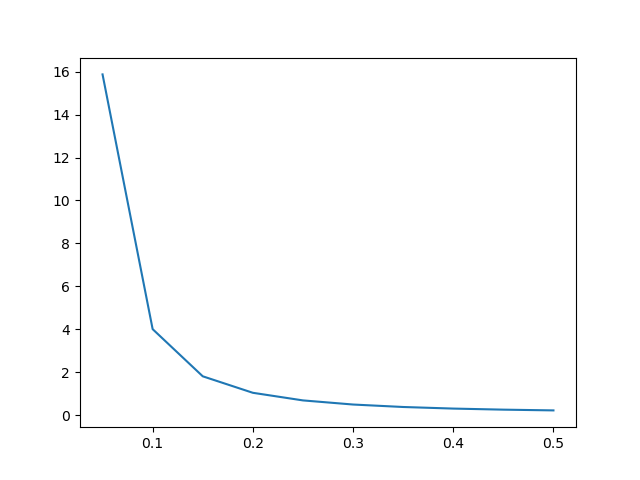

In [24]:
photon_energy_dep = [1.587394237741577818e+01, 4.001522216837105184e+00, 1.803659838346695743e+00,1.035200302330897104e+00,6.803117817523149924e-01,4.883203484712642095e-01,3.733289703180498464e-01,2.994570524591810834e-01,2.495663915552564505e-01,2.146361260185144504e-01]
fig, ax = plt.subplots()
plt.plot([0.05+0.05*i for i in range(len(photon_energy_dep))],photon_energy_dep)
plt.show()

[15.873942377415778,
 4.001522216837105,
 1.8036598383466957,
 1.035200302330897,
 0.680311781752315,
 0.4883203484712642,
 0.37332897031804985,
 0.2994570524591811,
 0.24956639155525645,
 0.21463612601851445]

In [69]:
#load the data with name "sigma_xyz_*_energy.txt"
import os
import subprocess

def load_data(energy):
    data = np.loadtxt("sigma_xyz_{}_energy.txt".format(energy))
    return data

s = []
for index in range(100):
    s.append([0.05 + 0.02*index, load_data(index)])

In [70]:
s = np.array(s)

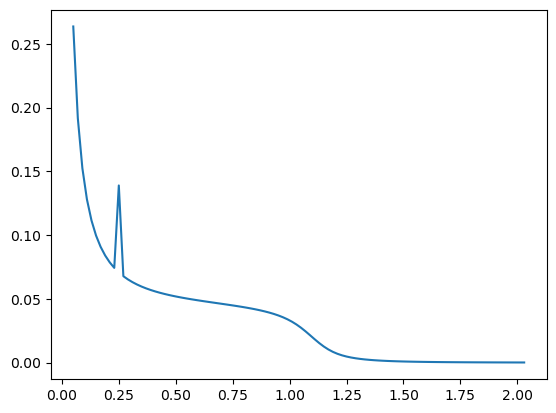

In [71]:
plt.plot(s[:,0],s[:,1])
#delta = 0.02

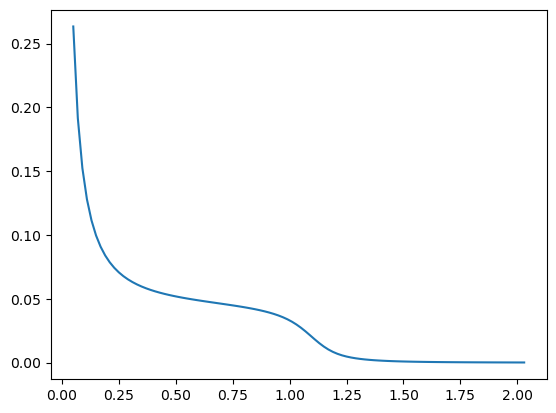

In [81]:
#load the data with name "sigma_xyz_*_energy.txt"
import os
import subprocess

def load_data(energy):
    data = np.loadtxt("sigma_xyz_{}_energy.txt".format(energy))
    return data

s = []
for index in range(100):
    s.append([0.05 + 0.02*index, load_data(index)])

s = np.array(s)
plt.plot(s[:,0],s[:,1])
#delta = 0.1

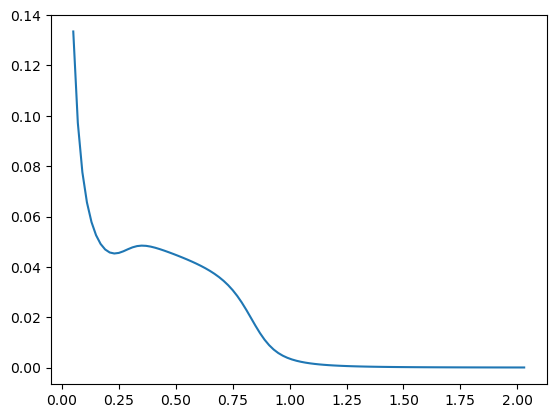

In [82]:
#load the data with name "sigma_xyz_*_energy.txt"
#change the band parameter
import os
import subprocess

def load_data(energy):
    data = np.loadtxt("sigma_xyz_{}_energy.txt".format(energy))
    return data

s = []
for index in range(100):
    s.append([0.05 + 0.02*index, load_data(index)])

s = np.array(s)
plt.plot(s[:,0],s[:,1])
#delta = 0.1

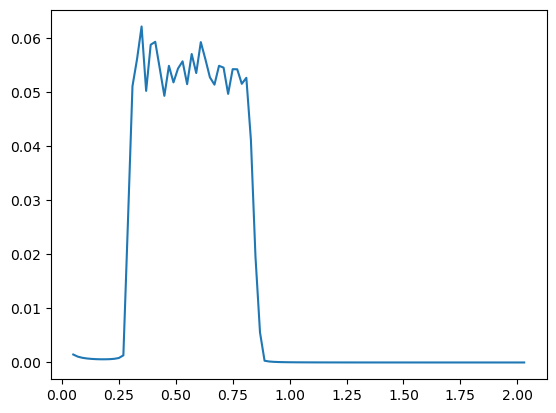

In [83]:
#load the data with name "sigma_xyz_*_energy.txt"
#change the band parameter
import os
import subprocess

def load_data(energy):
    data = np.loadtxt("sigma_xyz_{}_energy.txt".format(energy))
    return data

s = []
for index in range(100):
    s.append([0.05 + 0.02*index, load_data(index)])

s = np.array(s)
plt.plot(s[:,0],s[:,1])
#delta = 0.1

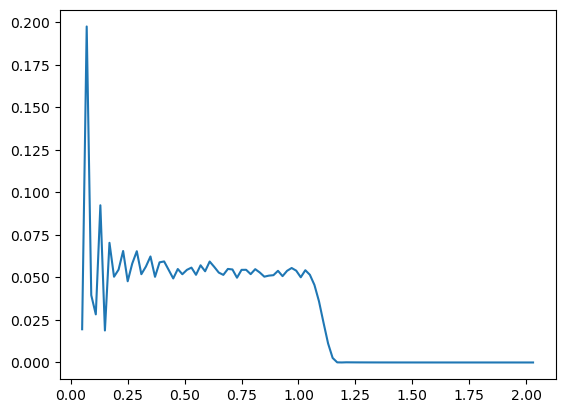

In [84]:
#load the data with name "sigma_xyz_*_energy.txt"
import os
import subprocess

def load_data(energy):
    data = np.loadtxt("sigma_xyz_{}_energy.txt".format(energy))
    return data

s = []
for index in range(100):
    s.append([0.05 + 0.02*index, load_data(index)])

s = np.array(s)
plt.plot(s[:,0],s[:,1])
#delta = 0.001

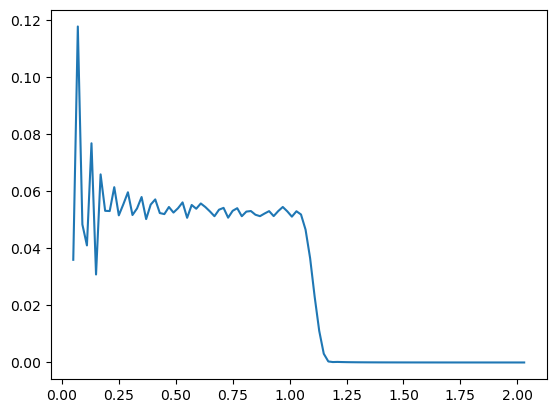

In [85]:
#load the data with name "sigma_xyz_*_energy.txt"
import os
import subprocess

def load_data(energy):
    data = np.loadtxt("sigma_xyz_{}_energy.txt".format(energy))
    return data

s = []
for index in range(100):
    s.append([0.05 + 0.02*index, load_data(index)])

s = np.array(s)
plt.plot(s[:,0],s[:,1])
#delta = 0.002

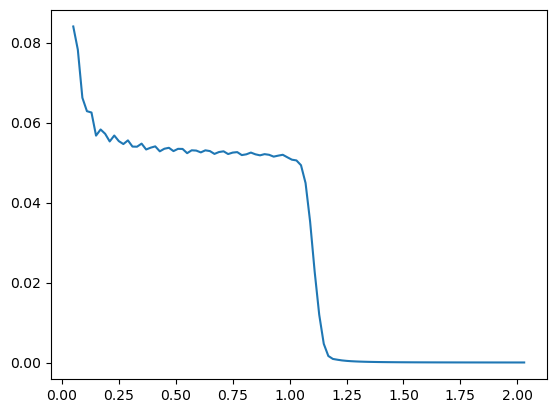

In [86]:
#load the data with name "sigma_xyz_*_energy.txt"
import os
import subprocess

def load_data(energy):
    data = np.loadtxt("sigma_xyz_{}_energy.txt".format(energy))
    return data

s = []
for index in range(100):
    s.append([0.05 + 0.02*index, load_data(index)])

s = np.array(s)
plt.plot(s[:,0],s[:,1])
#delta = 0.002

In [90]:
delta = 0.0
delta2 = 0.0
Terms = np.array([
    (-A/4, 0, 2, 1, 0, 0),
    (-A/4, 1, 3, 1, 0, 0),
    (-A/4, 2, 0, 1, 0, 1),
    (-A/4, 3, 1, 1, 0, 1),
    (A/4, 2, 0, -1, 0 , 1),
    (A/4, 3, 1, -1, 0 , 1),
    (A/4, 0, 2, -1, 0 ,0 ),
    (A/4, 1, 3, -1, 0 ,0 ),
    (-np.cos(k1), 0, 1, 0, 0, 0),
    (-np.cos(k1), 2, 3, 0, 0, 0),
    (np.exp(1j*theta)/2,0, 1 ,-1,0,0),
    (np.exp(1j*theta)/2,2, 3 ,-1,0,0),
    (np.exp(1j*theta)/2,1, 0 ,-1,0,0),
    (np.exp(1j*theta)/2,3, 2 ,-1,0,0),
    (1/(2j)*(-1j),1,0, 0, -1, 0),
    (1/(2j)*(1j), 0,1, 0, -1, 0),
    (1/(2j)*(-1j),3,2, 0, -1, 0),
    (1/(2j)*(1j), 2,3, 0, -1, 0),
    (1/2, 0, 0, 0, 0, 0),
    (-1/2, 1, 1, 0, 0, 0),
    (1/2, 2, 2, 0, 0, 0),
    (-1/2, 3, 3, 0, 0, 0),
    (0.5 + delta2, 2, 0, 0, 0, 0), #Interorbital hopping
    (-0.5 + delta2, 3, 1, 0, 0, 0),
    (0.5 - delta2, 0, 2, 0, 0, -1),
    (-0.5 - delta2, 1, 3, 0, 0, -1),
    (-0.5, 0, 0, 0, -1,0),
    (0.5, 1, 1, 0, -1,0),
    (-0.5, 2, 2, 0.0, -1, 0),
    (0.5, 3, 3, 0, -1,0),
    #CDW terms
    (delta, 3, 0, 0, 0, 0),
    (delta, 2, 1, 0, 0, 0),
    (-delta, 3, 0, 0, 0, 1),
    (-delta, 2, 1, 0, 0, 1),
])

In [95]:
lattice = np.array([[1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,2.0]], dtype = np.float64)
Terms[0][3:].T @ lattice

array([1.+0.j, 0.+0.j, 0.+0.j])

In [96]:
position = np.array([[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.5],[0.0,0.0,0.5]], dtype = np.float64)

In [100]:
position[2].T @ lattice

array([0., 0., 1.])

In [106]:
Terms[0][3:][0].real

1.0

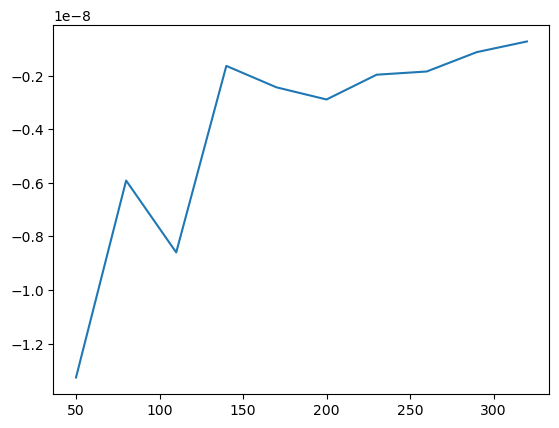

In [108]:
#load the data with name "sigma_xyz_*_energy.txt"
import os
import subprocess

def load_data(energy):
    data = np.loadtxt("sigma_xyz_{}_double_energy.txt".format(energy))
    return data

s = []
for index in range(10):
    s.append([50 + 30*index, load_data(index)])

s = np.array(s)
plt.plot(s[:,0],s[:,1])
#delta = 0.002

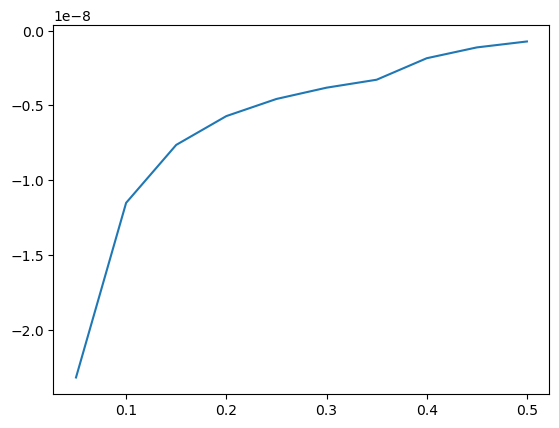

In [109]:
#load the data with name "sigma_xyz_*_energy.txt"
import os
import subprocess

def load_data(energy):
    data = np.loadtxt("sigma_xyz_{}_double_energy.txt".format(energy))
    return data

s = []
for index in range(10):
    s.append([0.05+0.05*index, load_data(index)])

s = np.array(s)
plt.plot(s[:,0],s[:,1])
#delta = 0.002

In [139]:
#load the data with name "sigma_xyz_*_energy.txt"
import os
import subprocess

def load_data(energy):
    data = np.loadtxt("sigma_xyz_{}_double_energy.txt".format(energy))
    return data

s = []
for index in range(100):
    s.append([0.05+0.05*index, load_data(index)])

s = np.array(s)
plt.plot(s[:,0],s[:,1])
#delta = 0.002

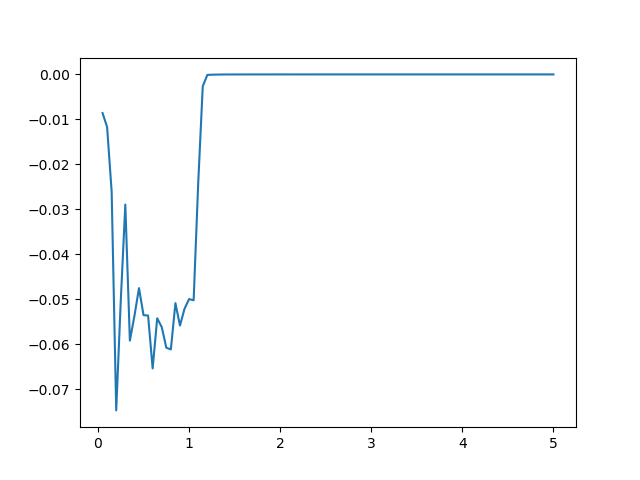

In [142]:
#load the data with name "sigma_xyz_*_energy.txt"
import os
import subprocess

def load_data(energy):
    data = np.loadtxt("sigma_xyz_{}_double_energy.txt".format(energy))
    return data

s = []
for index in range(100):
    s.append([0.05+0.05*index, load_data(index)])

s = np.array(s)
fig, ax = plt.subplots()
plt.plot(s[:,0],s[:,1])
plt.show()
#delta = 0.002

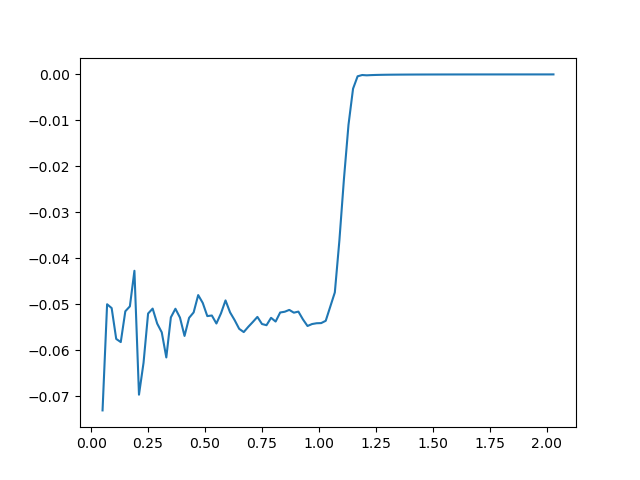

In [149]:
#load the data with name "sigma_xyz_*_energy.txt"
import os
import subprocess

def load_data(energy):
    data = np.loadtxt("sigma_xyz_{}_double_energy_analy.txt".format(energy))
    return data

s = []
for index in range(100):
    s.append([0.05+0.02*index, load_data(index)])

s = np.array(s)
fig, ax = plt.subplots()
plt.plot(s[:,0],s[:,1])
plt.show()
#delta = 0.002

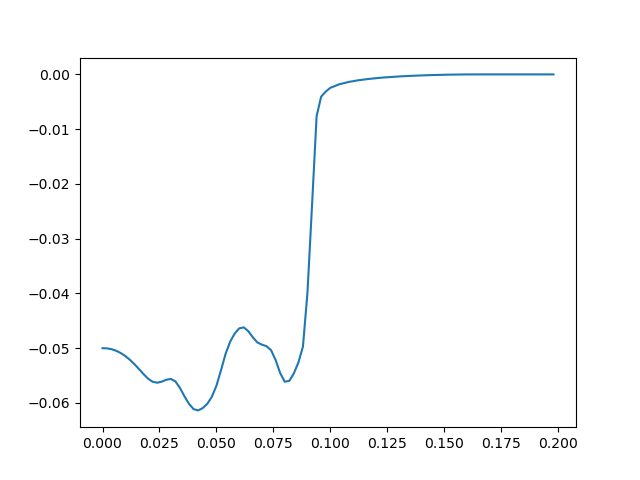

In [174]:
#load the data with name "sigma_xyz_*_energy.txt"
import os
import subprocess

def load_data(energy):
    data = np.loadtxt("sigma_xyz_{}_double_gap_analy.txt".format(energy))
    return data

s = []
for index in range(100):
    s.append([0 + 0.002*index, load_data(index)])

s = np.array(s)
fig, ax = plt.subplots()
plt.plot(s[:,0],s[:,1])
plt.show()
#delta = 0.002

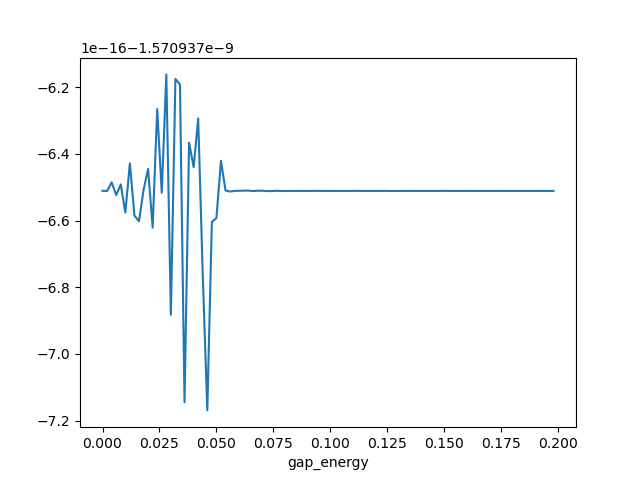

In [178]:
import os
import subprocess

#extremely small values when the Fermi level is at zero energy

def load_data(energy):
    data = np.loadtxt("sigma_xyz_{}_double_gap_analy.txt".format(energy))
    return data

s = []
for index in range(100):
    s.append([0 + 0.002*index, load_data(index)])

s = np.array(s)
fig, ax = plt.subplots()
plt.plot(s[:,0],s[:,1])
plt.xlabel("gap_energy")
plt.show()
#delta = 0.002

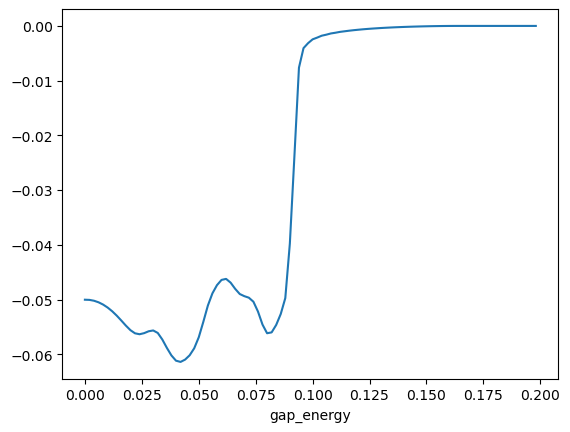

In [3]:
import os
import subprocess

#extremely small values when the Fermi level is -Asin(k1)

def load_data(energy):
    data = np.loadtxt("sigma_xyz_{}_double_gap_analy.txt".format(energy))
    return data

s = []
for index in range(100):
    s.append([0 + 0.002*index, load_data(index)])

s = np.array(s)
fig, ax = plt.subplots()
plt.plot(s[:,0],s[:,1])
plt.xlabel("gap_energy")
plt.show()
#